# Pymaceuticals Inc.

### Observations:
#### 1. Average tumor volume increased as mouse weight increased.
#### 2. Tumor volume decreased for Mouse y793 after taking Capomulin.
#### 3.  There is a positive correlation between weight and tumor volume for mice on Capomulin.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
mouse_unique = mouse_study["Mouse ID"].unique()
mouse_count = len(mouse_unique)
mouse_count

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.duplicated(subset=None, keep='first')
duplicate_mice_df = mouse_study.copy()
duplicate_mice_df["Duplicate row"] = duplicate_mice
duplicates_drop = duplicate_mice_df.loc[duplicate_mice_df["Duplicate row"] == True,["Mouse ID", "Timepoint"]]
duplicates_drop

,Mouse ID,Timepoint
909,g989,0


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study["Mouse ID"].isin(duplicates_drop)==False]
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
mouse_unique_clean = mouse_study_clean["Mouse ID"].nunique()
mouse_unique_clean

249

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_study_groupby = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])
mouse_study_groupby

In [57]:
tum_vol_mean = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).mean()
tum_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [59]:
tum_vol_med = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).median()
tum_vol_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [60]:
tum_vol_var = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).var()
tum_vol_std = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).std()
tum_vol_sem = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).sem()

In [61]:
tum_vol_stats = pd.DataFrame({"Mean Tumor Volume": tum_vol_mean,
                             "Median Tumor Volume": tum_vol_med,
                             "Tumor Volume Variance": tum_vol_var,
                             "Tumor Volume Standard Deviation": tum_vol_std,
                             "Tumor Volume Standard Error": tum_vol_sem})
tum_vol_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Charts and Pie Charts

Text(0.5, 1.0, 'Total Timepoint by Drug Regimen')

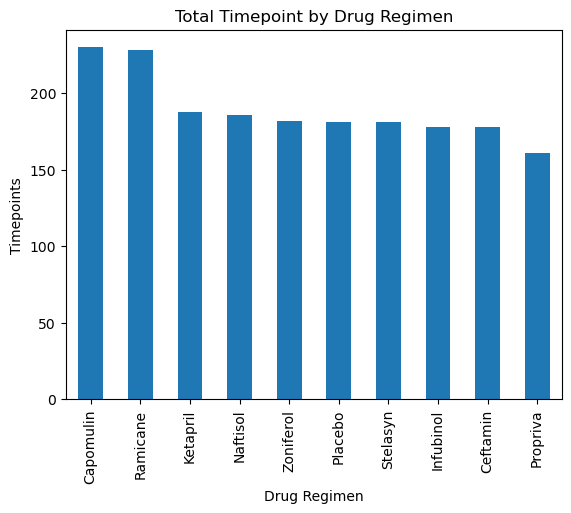

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = mouse_study_clean["Drug Regimen"].value_counts()
bar1 = timepoint_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Total Timepoint by Drug Regimen")

Text(0.5, 1.0, 'Total Timepoint by Drug Regimen')

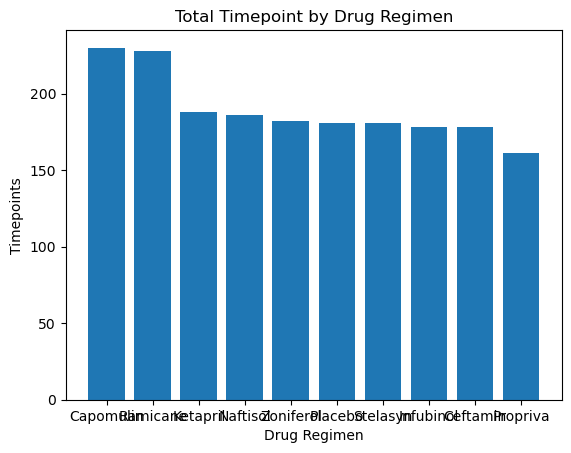

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import numpy as np
import matplotlib.pyplot as plt

xaxis = timepoint_count.index.values
yaxis = timepoint_count.values

plt.bar(xaxis, yaxis)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Total Timepoint by Drug Regimen")

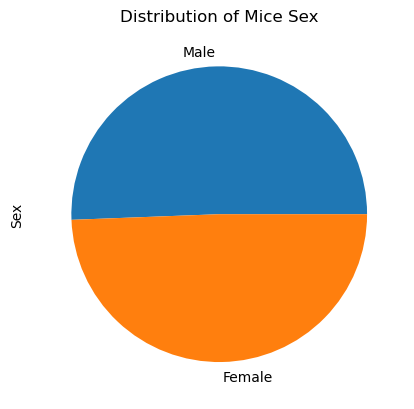

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
timepoint_count = mouse_study_clean["Sex"].value_counts()
pie1 = timepoint_count.plot.pie()
plt.title("Distribution of Mice Sex")
index=['Male', 'Female']

NameError: name 'ax' is not defined

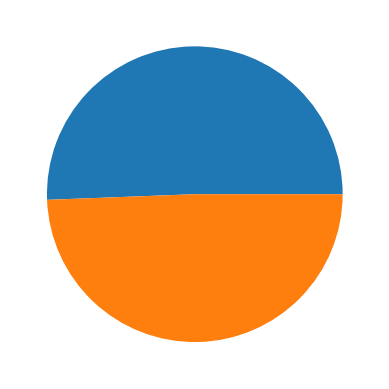

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(timepoint_count.values)
labels = ["Male", "Female"]
ax.legend(sex, title="Sex", loc="center left")
ax.set_title("Distribution of Mice Sex")

## Quartiles, Outliers, and Boxplots 

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tum_vol = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max()
final_tum_vol = final_tum_vol.reset_index()


In [86]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_mouse_study = pd.merge(mouse_study_clean, final_tum_vol, how="left", on=["Mouse ID","Timepoint"])
final_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [88]:
# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data =[]

In [103]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in treatments:
    tum_vol_final = final_mouse_study.loc[final_mouse_study["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tum_vol_data.append(tum_vol_final)
    quartiles = tum_vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.685932865
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 7.314067135000002
The median of tumor volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
The lower quartile of tumor volume is: 36.674634585
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 8.325365415
The median of tumor volume is: 40.67323554 
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
The lower quartile of tumor volume is: 47.3123533
The upper quartile of tumor volume is: 57.314443967500004
The interquartile range of tumor volume is: 10.002090667500006
The median of tumor volume is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
The lower quartile of tumor volume is: 47.2084271125
The upper quartile of tumor volu

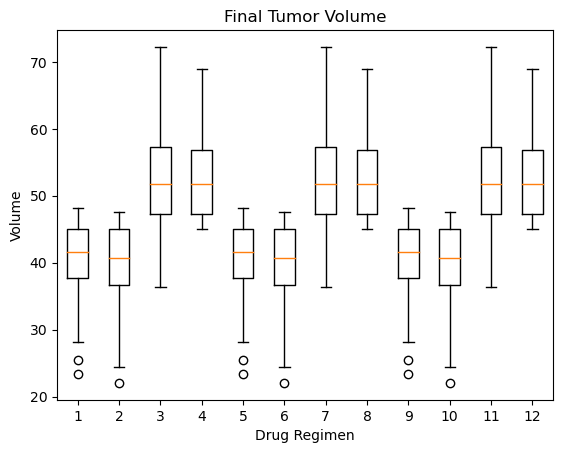

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Volume')
ax1.boxplot(tum_vol_data)
plt.show()

## Line and Scatter Plots 

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint Mouse y793')

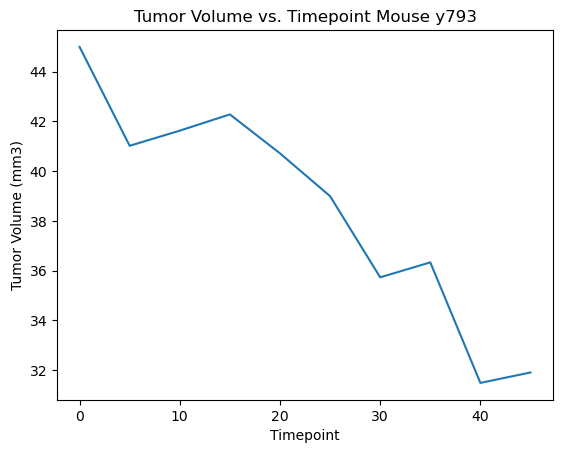

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]== "Capomulin"]
mouse = capomulin.loc[mouse_study_clean["Mouse ID"] == "y793"]
x = mouse["Timepoint"]
y = mouse["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y)
plt.title("Tumor Volume vs. Timepoint Mouse y793")

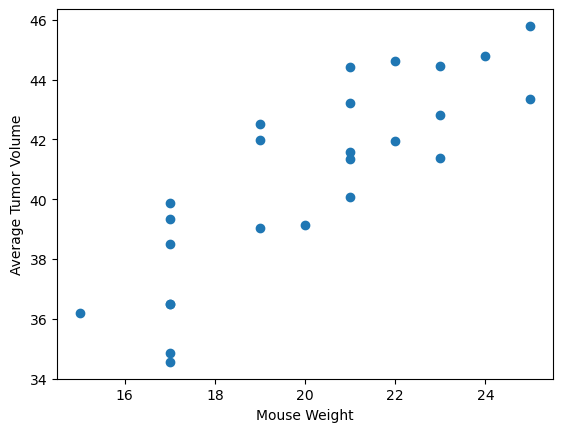

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
sctplt = capomulin.groupby("Mouse ID").mean()
x = sctplt["Weight (g)"]
y = sctplt["Tumor Volume (mm3)"]
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(x,y)

## Correlation and Regression 

The correlation between both factors is 0.84


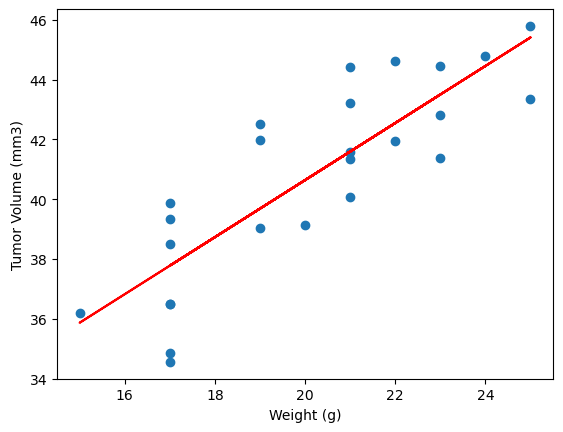

In [115]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = sctplt["Weight (g)"]
y = sctplt["Tumor Volume (mm3)"]
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regression_values = x * slope + intercept
line = f"y = {slope}x + {intercept}"
plt.plot(x,regression_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x,y)